## 安装方法

[https://seaborn.pydata.org/installing.html](https://seaborn.pydata.org/installing.html)

[https://seaborn.pydata.org/examples/index.html](https://seaborn.pydata.org/examples/index.html)

[https://seaborn.pydata.org/api.html](https://seaborn.pydata.org/api.html)

```shell
pip install seaborn

pip install seaborn[stats]
```

Mandatory dependencies:

```
    numpy
    pandas
    matplotlib
```

Optional dependencies

```
    statsmodels, for advanced regression plots
    scipy, for clustering matrices and some advanced options
    fastcluster, faster clustering of large matrices
```

In [ ]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt

import seaborn as sns
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

## Seaborn 介绍

Seaborn 是一个用 Python 制作统计图形的库。它建立在 matplotlib 之上，并与 pandas 数据结构紧密集成。

- Seaborn 可帮助您探索和理解您的数据。它的绘图功能对包含整个数据集的数据框和数组进行操作，并在内部执行必要的语义映射和统计聚合以生成信息图。其面向数据集的声明式 API 让您可以专注于绘图的不同元素的含义，而不是关注如何绘制它们的细节。

- seaborn 使用 matplotlib 绘制其绘图。对于交互式工作，建议在 matplotlib 模式下使用 Jupyter/IPython 接口，否则您必须在要查看绘图时调用 matplotlib.pyplot.show()。

Seaborn 与 matplotlib 的集成允许您在 matplotlib 支持的许多环境中使用它，包括笔记本中的探索性分析、GUI 应用程序中的实时交互以及多种光栅和矢量格式的存档输出。虽然你可以只使用 seaborn 函数来提高工作效率，但完全自定义你的图形需要一些 matplotlib 的概念和 API 知识。对于 seaborn 的新用户来说，学习曲线的一个方面是知道什么时候需要下拉到 matplotlib 层才能实现特定的定制。另一方面，来自 matplotlib 的用户会发现他们的大部分知识转移。

Matplotlib 拥有全面而强大的 API；几乎可以根据自己的喜好更改图形的任何属性。 seaborn 的高级界面和 matplotlib 的深度可定制性相结合，将使您既可以快速探索数据，又可以创建可定制为出版质量最终产品的图形。

In [ ]:
# Import seaborn
import seaborn as sns
import pandas as pd

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = pd.read_csv('https://mirror.coggle.club/seaborn-data/tips.csv')

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

In [ ]:
dots = pd.read_csv('https://mirror.coggle.club/seaborn-data/dots.csv')

sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)


In [ ]:
fmri = pd.read_csv('https://mirror.coggle.club/seaborn-data/fmri.csv')
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

In [ ]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

In [ ]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

In [ ]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

In [ ]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

In [ ]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

In [ ]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

In [ ]:
penguins = pd.read_csv('https://mirror.coggle.club/seaborn-data/penguins.csv')
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

In [ ]:
sns.pairplot(data=penguins, hue="species")

In [ ]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

In [ ]:
sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
)

In [ ]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)

## API Overview

### Overview of seaborn plotting functions

本教程后面的章节将探讨每个功能提供的特定功能。本章将从高层次上介绍您将遇到的不同类型的函数。Seaborn所有功能都可以在顶层API。但代码本身是分层结构的，具有通过不同方式实现相似可视化目标的功能模块。大多数文档都是围绕这些模块构建的：您会遇到诸如“关系”、“分布式”和“分类”之类的名称。

In [ ]:
penguins = pd.read_csv('https://mirror.coggle.club/seaborn-data/penguins.csv')
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

In [ ]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

### Figure-level vs. axes-level functions

除了不同的模块之外，seaborn 功能还有一个交叉分类，即“axes-level”或“figure-level”。上面的示例是axes-level。他们将数据绘制到单个 matplotlib.pyplot.Axes 对象上，这是函数的返回值。

相比之下，figure-level通过管理图形的 seaborn 对象（通常是 FacetGrid）与 matplotlib 交互。每个模块都有一个图形级功能，它为其各种轴级功能提供统一的接口。

figure-level包装axes-level对应项，并将特定于类型的关键字参数（例如直方图的 bin 大小）传递给底层函数。这意味着它们同样灵活，但也有一个缺点：特定于种类的参数不会出现在函数签名或文档字符串中。

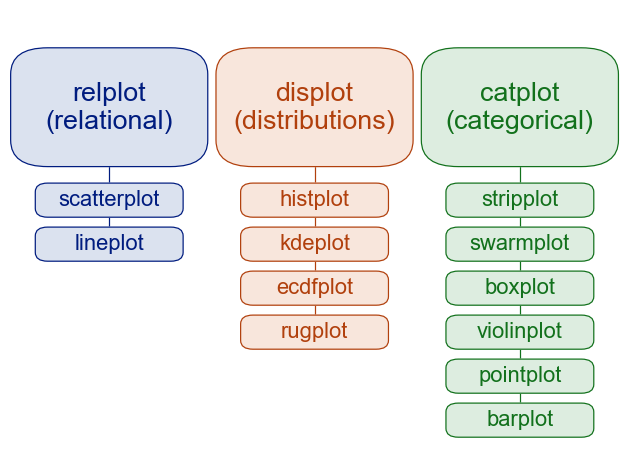

In [ ]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

In [ ]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind='kde')

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

In [ ]:
tips = pd.read_csv('https://mirror.coggle.club/seaborn-data/tips.csv')
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

In [ ]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

In [ ]:
f, ax = plt.subplots()

In [ ]:
f, ax = plt.subplots(1, 2, sharey=True)

### Long-form vs. wide-form data

seaborn 中的大多数绘图功能都面向数据向量。当绘制 x 与 y 时，每个变量都应该是一个向量。
- Long-form data：每个变量都是一列，优势在于它非常适合这种明确的绘图规范。它可以容纳任意复杂的数据集，只要可以清楚地定义变量和观察值。但是这种格式需要一些时间来适应，因为它通常不是人们头脑中的数据模型。
- Wide-form data：通过名称访问数据集中的变量，列与行之间存在逻辑关联。

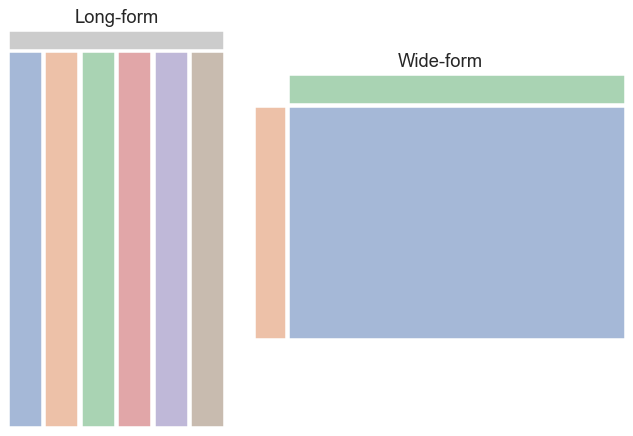

In [ ]:
flights = pd.read_csv('https://mirror.coggle.club/seaborn-data/flights.csv')
flights.head()

In [ ]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

In [ ]:
sns.relplot(data=flights_wide, kind="line")

In [ ]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line")

In [ ]:
sns.relplot(data=flights_wide.transpose(), kind="line")

## Objects interface

seaborn.objects 命名空间是在 0.12 版中引入的，作为制作 seaborn 绘图的全新接口。它提供了更加一致和灵活的 API，包括用于转换和绘制数据的可组合类的集合。与现有的 seaborn 函数相比，新接口旨在支持端到端绘图规范和自定义。

In [ ]:
import seaborn.objects as so
import pandas as pd
penguins = pd.read_csv('https://mirror.coggle.club/seaborn-data/penguins.csv')

(
    so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm")
    .add(so.Dot())
)

In [ ]:
(
    so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm")
    .add(so.Dot(color="g", pointsize=4))
)

In [ ]:
(
    so.Plot(
        penguins, x="bill_length_mm", y="bill_depth_mm",
        color="species", pointsize="body_mass_g",
    )
    .add(so.Dot())
)

In [ ]:
(
    so.Plot(penguins, x="species", y="body_mass_g")
    .add(so.Bar(), so.Agg())
)

In [ ]:
penguins = pd.read_csv('https://mirror.coggle.club/seaborn-data/penguins.csv')
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg())
)

In [ ]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge())
)

In [ ]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(), so.Dodge())
)

In [ ]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(), so.Dodge(), so.Jitter(.3))
)

In [ ]:
tips = pd.read_csv('https://mirror.coggle.club/seaborn-data/tips.csv')
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)

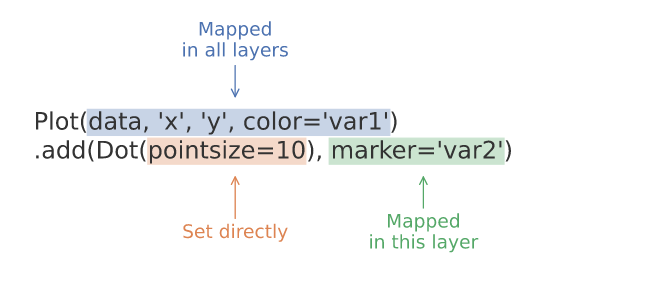

In [ ]:
(
    so.Plot(tips, x="total_bill", y="tip", color="time")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)

In [ ]:
(
    so.Plot(penguins, y="body_mass_g", color="species")
    .pair(x=["bill_length_mm", "bill_depth_mm"])
    .facet(row="sex")
    .add(so.Dots())
)

In [ ]:
healthexp = pd.read_csv('https://mirror.coggle.club/seaborn-data/healthexp.csv')
p = so.Plot(healthexp, "Year", "Spending_USD", color="Country")
p.add(so.Line())

In [ ]:
p.add(so.Area(), so.Stack())

## Properties of Mark objects

### x, y, xmin, xmax, ymin, ymax

坐标属性决定了在绘图上绘制标记的位置。通常，x 坐标是水平位置，y 坐标是垂直位置。一些标记接受一个或两个变量的跨度（即最小值、最大值）参数化。如果变量不包含数字数据，则其比例将应用转换，以便可以在屏幕上绘制数据。

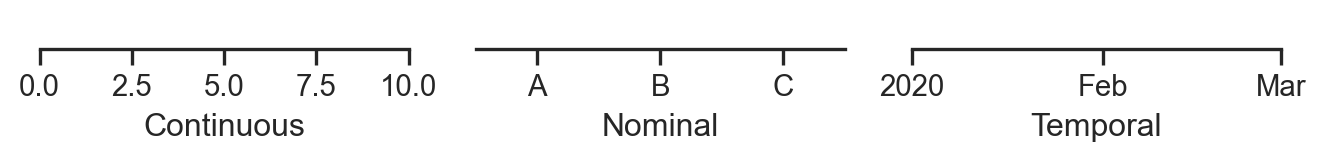

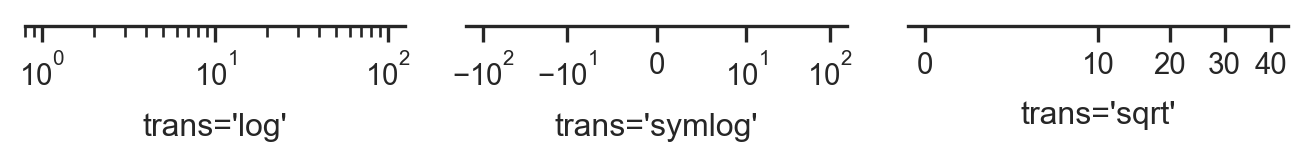

### color, fillcolor, edgecolor

所有标记都可以被赋予一种color，并且许多标记的“edge”和“fill”的颜色是不同的。

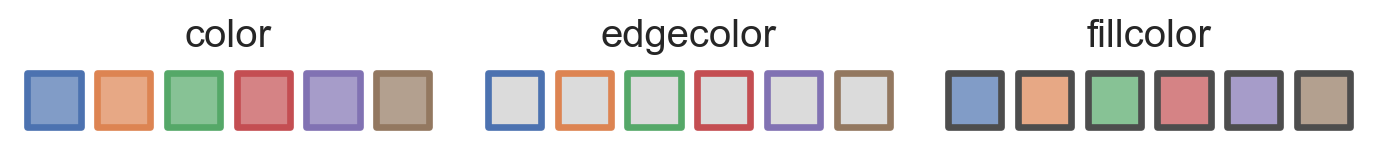

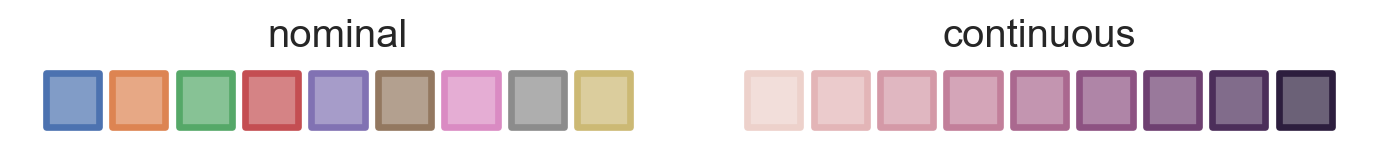

### alpha, fillalpha, edgealpha

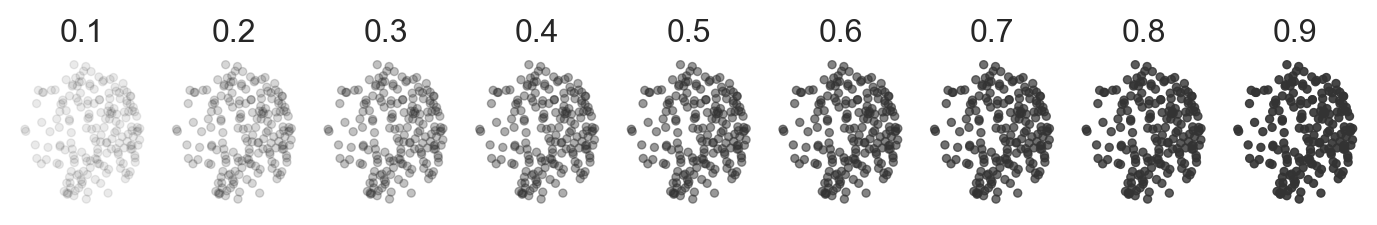

### marker

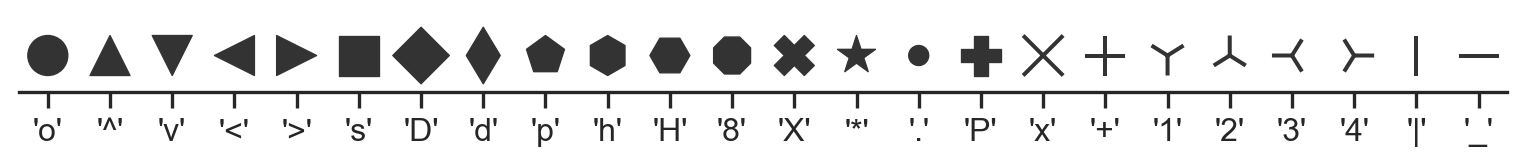

### linestyle, edgestyle

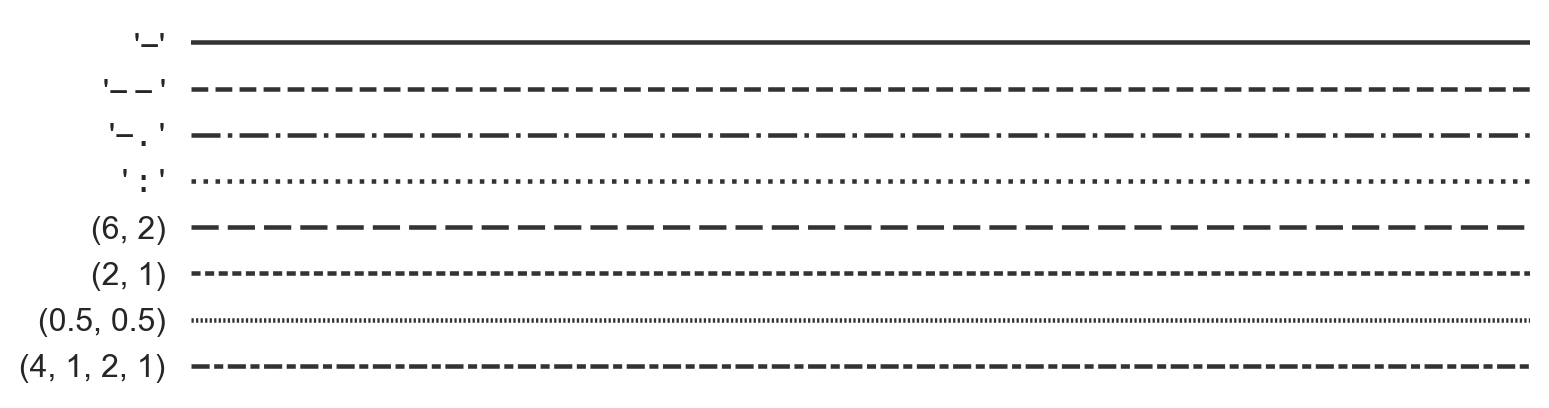

## Plotting functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt

### Visualizing statistical relationships

[`relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot) combines a [`FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) with one of two axes-level functions:

-   [`scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) (with `kind="scatter"`; the default)
-   [`lineplot()`](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) (with `kind="line"`)

In [ ]:
tips = pd.read_csv('https://mirror.coggle.club/seaborn-data/tips.csv')
sns.relplot(data=tips, x="total_bill", y="tip")

In [ ]:
dowjones = pd.read_csv('https://mirror.coggle.club/seaborn-data/dowjones.csv')
dowjones['DATE'] = pd.to_datetime(dowjones['DATE'])

sns.relplot(data=dowjones, x="DATE", y="M1109BUSM293NNBR", kind="line")

In [ ]:
fmri = pd.read_csv('https://mirror.coggle.club/seaborn-data/fmri.csv')
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar=None,
)

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="region", style="event",
    dashes=False, markers=True,
)

### Visualizing distributions of data

The axes-level functions are [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot), [`kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot), [`ecdfplot()`](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html#seaborn.ecdfplot), and [`rugplot()`](https://seaborn.pydata.org/generated/seaborn.rugplot.html#seaborn.rugplot). They are grouped together within the figure-level [`displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot), [`jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot), and [`pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot) functions.

In [ ]:
penguins = pd.read_csv('https://mirror.coggle.club/seaborn-data/penguins.csv')
sns.displot(penguins, x="flipper_length_mm")

In [ ]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

In [ ]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

In [ ]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf")

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

In [ ]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

In [ ]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

In [ ]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

### Visualizing categorical data

Categorical scatterplots:

-   [`stripplot()`](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot) (with `kind="strip"`; the default)
-   [`swarmplot()`](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot) (with `kind="swarm"`)

Categorical distribution plots:

-   [`boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) (with `kind="box"`)
-   [`violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot) (with `kind="violin"`)
-   [`boxenplot()`](https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot) (with `kind="boxen"`)

Categorical estimate plots:

-   [`pointplot()`](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot) (with `kind="point"`)
-   [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot) (with `kind="bar"`)
-   [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) (with `kind="count"`)

In [ ]:
tips = pd.read_csv('https://mirror.coggle.club/seaborn-data/tips.csv')
sns.catplot(data=tips, x="day", y="total_bill")

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm")

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

In [ ]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex", kind="violin",
)

In [ ]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", split=True,
)

In [ ]:
titanic = pd.read_csv('https://mirror.coggle.club/seaborn-data/titanic.csv')
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar")

In [ ]:
sns.catplot(
    data=titanic, y="deck", hue="class", kind="count",
    palette="pastel", edgecolor=".6",
)

In [ ]:
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="point")

In [ ]:
g = sns.catplot(
    data=titanic,
    x="fare", y="embark_town", row="class",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Fare", ylabel="")
g.set_titles(row_template="{row_name} class")

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')


## Statistical operations

### Statistical estimation and error bars

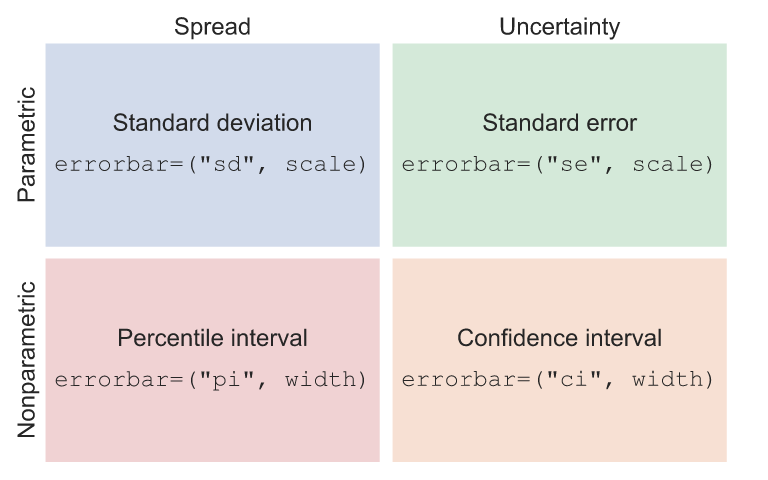

In [ ]:
def plot_errorbars(arg, **kws):
    np.random.seed(sum(map(ord, "error_bars")))
    x = np.random.normal(0, 1, 100)
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])

In [ ]:
plot_errorbars("sd")

In [ ]:
plot_errorbars(("pi", 50))

In [ ]:
plot_errorbars("se")

In [ ]:
plot_errorbars("ci")

In [ ]:
x = np.random.normal(0, 1, 50)
y = x * 2 + np.random.normal(0, 2, size=x.size)
sns.regplot(x=x, y=y)

### Estimating regression fits

In [ ]:
sns.regplot(x="total_bill", y="tip", data=tips)

In [ ]:
anscombe = pd.read_csv('https://mirror.coggle.club/seaborn-data/anscombe.csv')
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

In [ ]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

## Multi-plot grids

In [ ]:
tips = pd.read_csv('https://mirror.coggle.club/seaborn-data/tips.csv')

In [ ]:
g = sns.FacetGrid(tips, col="time")
g.map(sns.histplot, "tip")

In [ ]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

## Choosing color palettes

In [ ]:
sns.color_palette()

In [ ]:
sns.color_palette("tab10")

In [ ]:
sns.color_palette("hls", 8)

In [ ]:
sns.color_palette("rocket", as_cmap=True)

## Example gallery

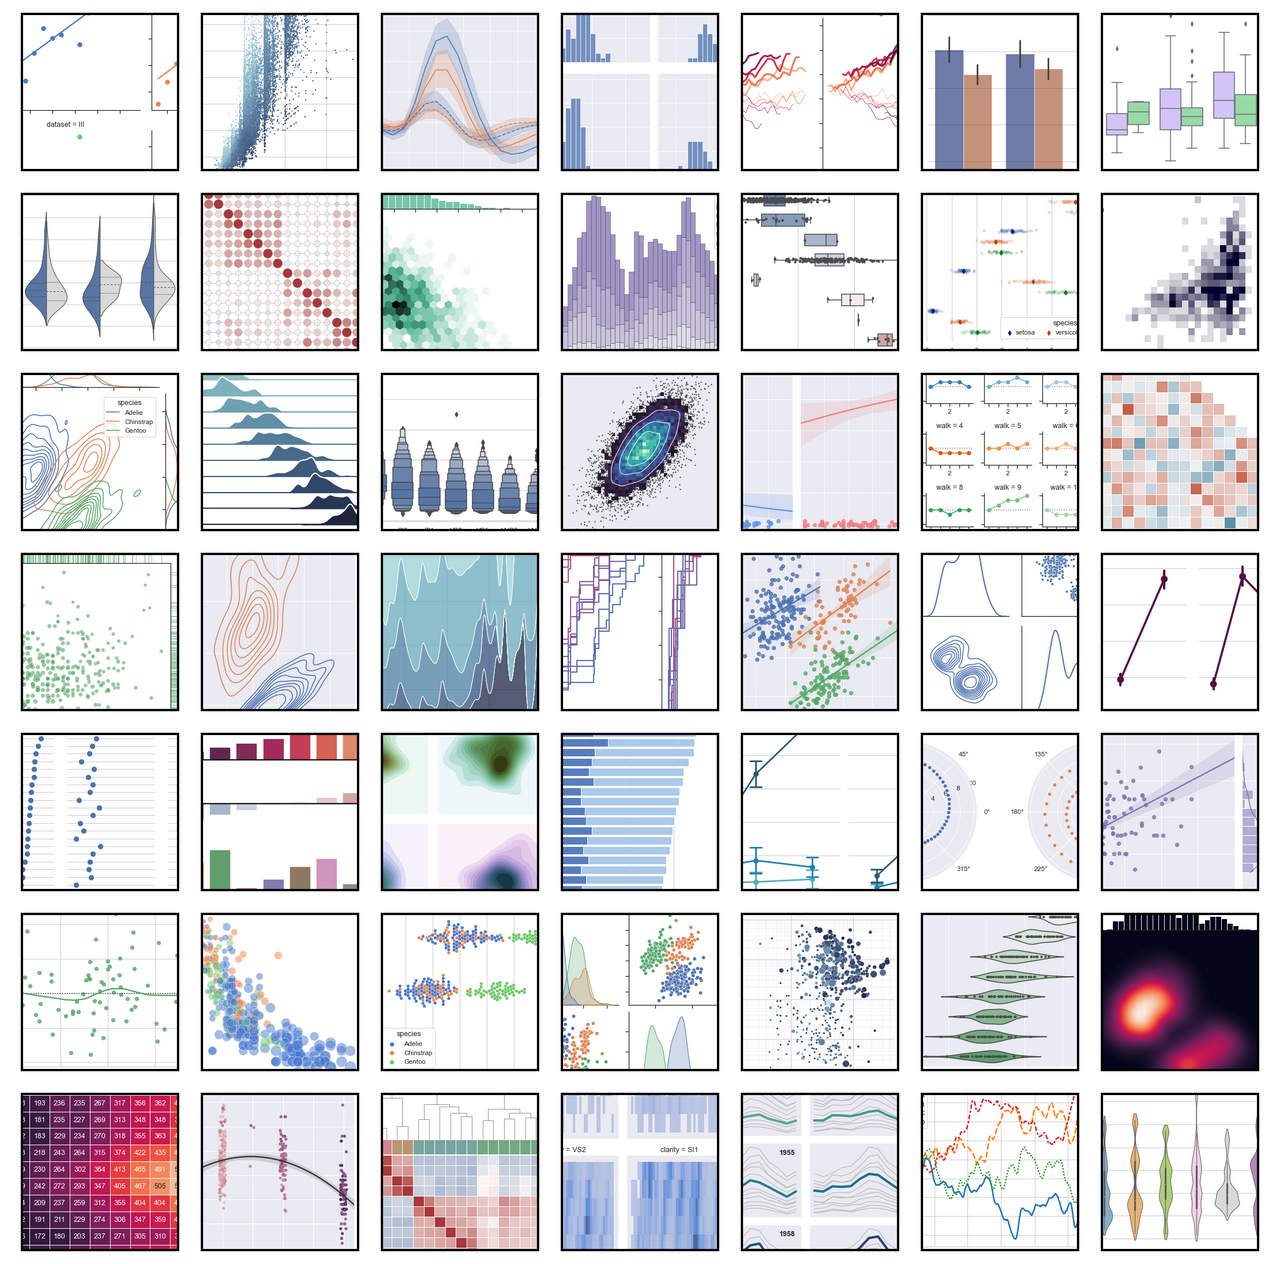

In [ ]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('jpg')
import matplotlib.pyplot as plt

### lmplot

In [ ]:
# Load the example dataset for Anscombe's quartet
df = pd.read_csv('https://mirror.coggle.club/seaborn-data/anscombe.csv')

# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

### scatterplot

In [ ]:
# Load the example diamonds dataset
diamonds = pd.read_csv('https://mirror.coggle.club/seaborn-data/diamonds.csv')

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

### lineplot

In [ ]:
# Load an example dataset with long-form data
fmri = pd.read_csv('https://mirror.coggle.club/seaborn-data/fmri.csv')

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

### displot

In [ ]:
penguins = pd.read_csv('https://mirror.coggle.club/seaborn-data/penguins.csv')
sns.displot(
    penguins, x="flipper_length_mm", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

In [ ]:
dots = pd.read_csv('https://mirror.coggle.club/seaborn-data/dots.csv')

# Plot the lines on two facets
sns.relplot(
    data=dots,
    x="time", y="firing_rate",
    hue="coherence", size="choice", col="align",
    kind="line", size_order=["T1", "T2"], 
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

### catplot

In [ ]:
penguins = pd.read_csv('https://mirror.coggle.club/seaborn-data/penguins.csv')
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

### boxplot

In [ ]:
tips = pd.read_csv('https://mirror.coggle.club/seaborn-data/tips.csv')

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

### violinplot

In [ ]:
tips = pd.read_csv('https://mirror.coggle.club/seaborn-data/tips.csv')

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "b", "No": ".85"})

### scatterplot

In [ ]:
tips = pd.read_csv('https://mirror.coggle.club/seaborn-data/tips.csv')
sns.scatterplot(data=tips, x="total_bill", y="tip", hue='sex')

### jointplot

In [ ]:
rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

### histplot

In [ ]:
diamonds = pd.read_csv('https://mirror.coggle.club/seaborn-data/diamonds.csv')
sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

In [ ]:
planets = pd.read_csv('https://mirror.coggle.club/seaborn-data/planets.csv')

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
              size=4, color=".3", linewidth=0)

### stripplot

In [ ]:
iris = pd.read_csv('https://mirror.coggle.club/seaborn-data/iris.csv')
iris = pd.melt(iris, "species", var_name="measurement")

# Show each observation with a scatterplot
sns.stripplot(
    data=iris, x="value", y="measurement", hue="species",
    dodge=True, alpha=.25, zorder=1, legend=False
)

### jointplot

In [ ]:
penguins = pd.read_csv('https://mirror.coggle.club/seaborn-data/penguins.csv')

g = sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde",
)

### boxenplot

In [ ]:
diamonds = pd.read_csv('https://mirror.coggle.club/seaborn-data/diamonds.csv')

sns.boxenplot(x="clarity", y="carat",
              color="b", scale="linear", data=diamonds)

### lmplot

In [ ]:
titanic = pd.read_csv('https://mirror.coggle.club/seaborn-data/titanic.csv')

g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=titanic,
               y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

### heatmap

In [ ]:
# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### kdeplot

In [ ]:
iris = pd.read_csv('https://mirror.coggle.club/seaborn-data/iris.csv')

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=iris.query("species != 'versicolor'"),
    x="sepal_width",
    y="sepal_length",
    hue="species",
    thresh=.1,
)

### displot

In [ ]:
# Load the diamonds dataset
diamonds = pd.read_csv('https://mirror.coggle.club/seaborn-data/diamonds.csv')

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=diamonds,
    x="carat", hue="cut",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

### heatmap

In [ ]:
# Load the example flights dataset and convert to long-form
flights_long = pd.read_csv('https://mirror.coggle.club/seaborn-data/flights.csv')
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)